#### Nama : Kurniawan Eko Putra
#### Kelas : Instrumentasi 5A
#### NPT : 41210015

## Latihan 1 - Heart Disease Dataset

### Tentang Dataset

Dataset Penyakit Jantung diimpor menggunakan pandas, sebuah pustaka Python populer untuk analisis data. Dataset ini terdiri dari 303 baris dan 14 kolom, mencakup berbagai fitur dengan deskripsi sebagai berikut.
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Kolom target adalah label yang menandakan kehadiran penyakit jantung, di mana 1 berarti ada penyakit jantung dan 0 berarti tidak ada.

### Import Library

In [96]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

### Load the Heart Disease dataset

In [97]:
data = pd.read_csv('input/heart.csv')

### Explore the dataset and handle any missing values

In [98]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Cek apakah ada missing value atau tidak

In [100]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak ada nilai yang hilang dalam dataset, yang merupakan keadaan ideal karena ini mengurangi kebutuhan untuk teknik imputasi data yang bisa mempengaruhi akurasi model.

#### Mengganti nilai yang hilang (jika ada)

Misalnya, jika ada nilai NaN, kita bisa mengganti dengan nilai rata-rata atau median

In [101]:
data.fillna(data.mean(), inplace=True)
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

### Preprocess the data

#### Normalize Features

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Normalisasi fitur
scaler = StandardScaler()
features = data.drop('target', axis=1) # Asumsi kolom 'target' adalah label
features_scaled = scaler.fit_transform(features)

Normalisasi dilakukan pada fitur menggunakan `StandardScaler`. Ini penting karena beberapa algoritma pembelajaran mesin, termasuk SVM, sensitif terhadap skala data. Normalisasi membantu meningkatkan kinerja dan stabilitas model.
Data dibagi menjadi fitur (X) dan label (y). Kolom `target` adalah label yang kita coba prediksi.

### Split the dataset into training and testing sets.

In [103]:
# Load your data or ensure 'df' is defined
X = data.drop('target', axis=1)
y = data['target']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalization using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Print information after preprocessing
print("Dataset shape after preprocessing:", data.shape)
print("Missing values after preprocessing:\n", data.isnull().sum())

Dataset shape after preprocessing: (303, 14)
Missing values after preprocessing:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Train a classification model -Support Vector Machine

SVM adalah algoritma pembelajaran mesin yang populer untuk klasifikasi. SVM bekerja dengan mencari hiperplane dalam ruang multi-dimensi yang dengan terbaik memisahkan kelas-kelas data yang berbeda.
SVM dilatih dengan data pelatihan dan diharapkan bisa memetakan pola yang bisa digunakan untuk memprediksi keberadaan penyakit jantung pada data yang belum diketahui.

In [104]:
#Create a svm Classifier
ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(X_test)

### Evaluate the model's performance on the testing set

In [105]:
# Evaluasi performa model pada set pengujian.

# Melakukan prediksi pada set pengujian
y_pred = ml.predict(X_test)

# Menghitung akurasi dan laporan klasifikasi
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Akurasi Model: ", accuracy)
print("Laporan Klasifikasi:\n", classification_rep)


Akurasi Model:  0.8688524590163934
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



***Presisi (Precision):***

Presisi mengukur seberapa banyak dari kelas yang diprediksi sebagai positif oleh model yang sebenarnya benar-benar positif. Tujuannya adalah untuk mengurangi jumlah false positives.


***Recall (Sensitivitas atau Recall):***
Recall mengukur seberapa banyak dari kelas positif yang sebenarnya diprediksi dengan benar oleh model. Fokus utamanya adalah untuk mengurangi false negatives.

***F1-Score:***
F1-score adalah ukuran yang menggabungkan presisi dan recall ke dalam satu nilai tunggal. Ini adalah harmonic mean dari presisi dan recall. F1-score bermanfaat ketika kita ingin mencari keseimbangan antara presisi dan recall.

***Support:***
Support adalah jumlah sampel aktual yang termasuk dalam setiap kelas pada set pengujian.

***Akurasi (Accuracy):***
Akurasi adalah rasio prediksi yang benar secara keseluruhan dari jumlah total prediksi. Meskipun berguna, akurasi bisa menyesatkan ketika data tidak seimbang (imbalance) antara kelas-kelas target.

Metrik-metrik ini memberikan pemahaman yang lebih dalam tentang bagaimana model klasifikasi berkinerja terhadap setiap kelas yang diuji. Presisi, recall, dan F1-score penting untuk dipertimbangkan bersamaan untuk mengevaluasi apakah model memiliki kinerja yang baik dalam mengklasifikasikan data. Support menyediakan informasi tentang jumlah sampel yang sesungguhnya miliki kelas tertentu.

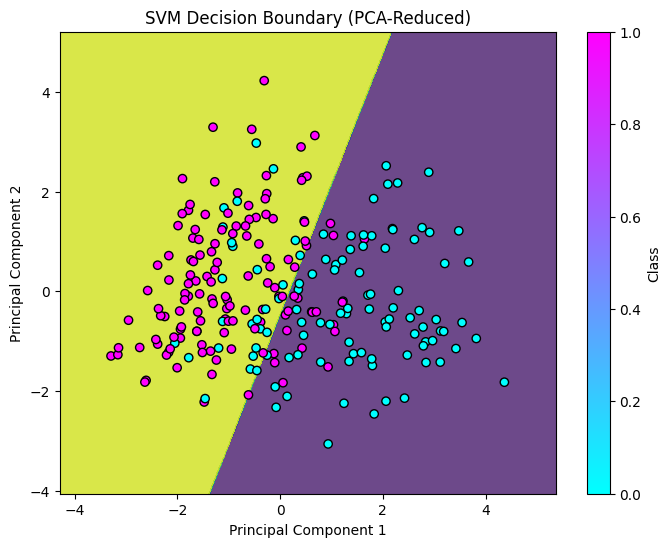

In [113]:
# Reduksi dimensi menggunakan PCA ke 2 komponen
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Inisialisasi model SVM dengan kernel linear
svm_model = SVC(kernel='linear', random_state=42)

# Training model SVM dengan data yang sudah direduksi dimensinya
svm_model.fit(X_train_pca, y_train)

# Buat mesh grid untuk plot decision boundary
h = 0.02  # Ukuran grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary dan data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='cool', edgecolor='black')  # Change colormap here
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary (PCA-Reduced)')
plt.colorbar(label='Class')
plt.show()
